In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [218]:

Token_spam_prob='SpamData/03_Testing/prob_spam.txt'
Token_ham_prob='SpamData/03_Testing/prob_ham.txt'
Token_all_prob='SpamData/03_Testing/prob_all.txt'

Test_feature_mtrx='SpamData/03_Testing/test_features.txt'
Test_target_file='SpamData/03_Testing/test_target.txt'

# load data

In [219]:
X_test=np.loadtxt(Test_feature_mtrx,delimiter=' ')
y_test=np.loadtxt(Test_target_file,delimiter=' ')

prob_token_spam=np.loadtxt(Token_spam_prob,delimiter=' ')
prob_token_ham=np.loadtxt(Token_ham_prob,delimiter=' ')
prob_all_token=np.loadtxt(Token_all_prob,delimiter=' ')

# CALCULATE the prob

In [220]:
X_test.dot(prob_token_spam).shape

(1724,)

In [221]:
Prob_spam=0.31
Prob_ham=1-0.31

In [222]:
np.log(prob_token_spam)

array([ -4.40753603,  -5.25361083,  -4.99001327, ..., -12.09415736,
        -9.04963492, -10.707863  ])

In [223]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_token))+np.log(Prob_spam)


In [224]:
joint_log_spam[:5]

array([24.29188006,  2.16088913, 20.59291804, 17.76908907, 20.52210242])

In [225]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_token))-np.log(Prob_ham)

In [226]:
joint_log_ham[:5]

array([-60.23812316, -10.26905231, -37.22832019, -58.40432473,
       -53.05799253])

In [227]:
joint_log_ham.size

1724

# predictions

In [228]:
#array of prediction whether a token is of spam or of ham

predict=joint_log_spam > joint_log_ham

In [229]:
predict[-5:]



array([ True, False, False, False, False])

In [230]:
y_test[-5:]

array([2., 2., 2., 2., 2.])

In [231]:
y_test=np.where(y_test==2, 0, y_test) 

In [232]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [233]:
X_test.shape[0]

1724

In [234]:
predict[:5]

array([ True,  True,  True,  True,  True])

# Accuracy

In [235]:
correct_docs = (y_test == predict).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Doc classified incorrectly', numdocs_wrong)


Docs classified correctly 1675
Doc classified incorrectly 49


In [236]:
y_target[:5]

array([1., 1., 1., 1., 1.])

In [237]:
print('Accuracy is ',correct_docs/len(X_test))

Accuracy is  0.9715777262180975


In [238]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(Prob_spam)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(Prob_ham)

# visualise results

In [239]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
linedata=np.linspace(start=-14000,stop=1,num=1000)

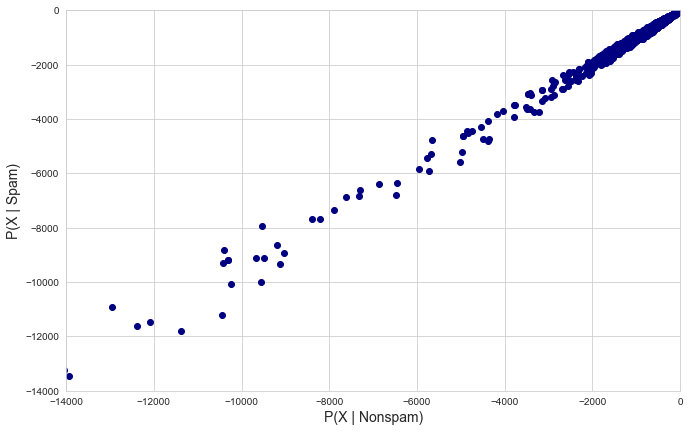

In [240]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

# boundary

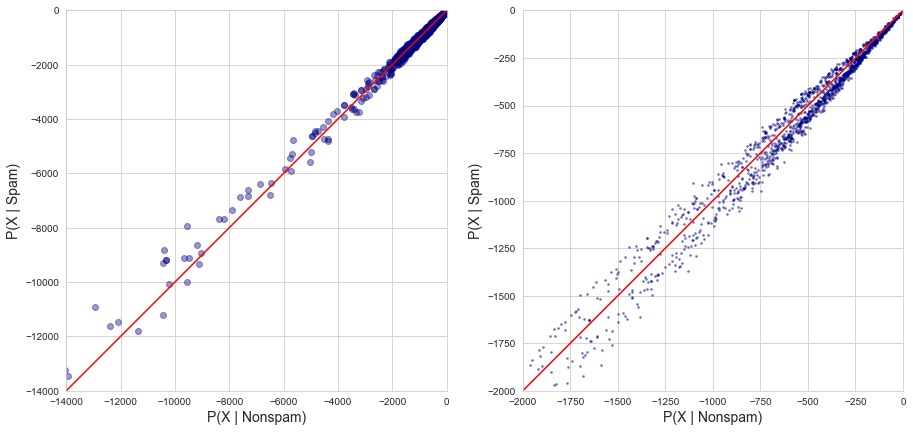

In [241]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy',alpha=0.4)
plt.plot(linedata,linedata,color='red')


plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy',alpha=0.4,s=3)
plt.plot(linedata,linedata,color='red')



plt.show()

# using seaborn

In [242]:
sns.set_style('whitegrid')
labels='Category'

sum_df=pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham,
                    labels:y_test})

C:\Users\bba_t\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


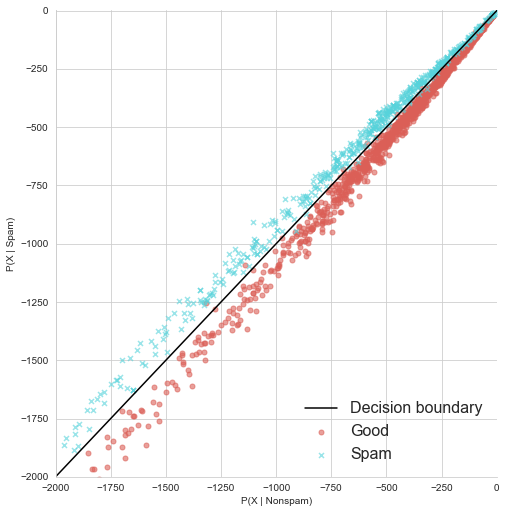

In [243]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=sum_df,size=7,legend=False,
           fit_reg=False,scatter_kws={'alpha':0.6,'s':25},
           hue=labels,markers=['o','x'],palette='hls')
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Decision boundary','Good','Spam'),loc='lower right',fontsize=16, frameon=False)
plt.show()

In [244]:
np.unique(predict,return_counts=True)

(array([False,  True]), array([1150,  574], dtype=int64))

In [245]:
true_pos=(y_test==1) & (predict ==1)

In [246]:
true_pos.sum()

557

In [247]:
false_pos=(y_test==0) & (predict ==1)

In [248]:
false_pos.sum()

17

In [249]:
false_neg=(y_test==1) & (predict ==0)
false_neg.sum()

32

In [250]:
precision=true_pos.sum()/(true_pos.sum()+false_pos.sum())

In [251]:
recall=true_pos.sum()/(true_pos.sum()+false_neg.sum())

In [252]:
f_score=2*(recall * precision)/(precision+recall)

In [253]:
f_score

0.9578675838349097